## EE522 - Final Project Notes

Project Mousetrap

Arnie Larson

Project takes audio via an ADC, processes the audio to attempt to determine who is likely talking and then responds accordingly

- the trap is the process of aquiring data
- the mouse is small human to detect

Signal Processing Goals and Learnings
- determine correct correspondence with wave file (10 bit unsigned analog value => 16 bit signed)
- plot FFT (takes absolute value of postive value, normalize FFT about 0)
- try to use singal.find_peaks to quickly grab resonances

Initial Goals:
- open sampled data in Jupyter
- determine if the sampling rate is consistent
- visualize small chunks of the data, look at overall pattern
- visualize FFT windows - can data be identified?
- can I read/write to wavfiles?


In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.io import wavfile
import csv

size of x600
size of y: 600
size of yf: 600


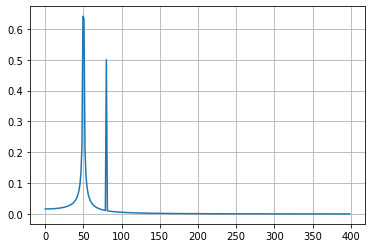

In [2]:
## Simple example from scipy tutorial:
## https://docs.scipy.org/doc/scipy/tutorial/fft.html
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
print("size of x{}".format(x.size))
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
print("size of y: {}".format(y.size))
print("size of yf: {}".format(yf.size))
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [129]:
# read utilities
# read2: read in csv file that has 2 columns, time and data
# read_1int: read in a single column CSV with int type
# write_wav: utility to convert a 10bit analog sample into 16 bit audio data
def read2(fname):
    t = []
    d = []
    with open(fname) as f:
        for line in f:
            l = [float(x) for x in line.split(",")]
            if len(l)==2:
                t.append(l[0])
                d.append(l[1])
                i+=1
        print("Read {} lines".format(len(t)))
    return np.array(t), np.array(d)

# read in csv file that has a single column int data
def read_1int(fname):
    d = []
    with open(fname) as f:
        for line in f:
            d.append(int(line))

        print("Read {} lines".format(len(d)))
    return np.array(d)

# default is to record raw_data from ADC, 10 bit.
# convert => shift to signed 16bit
# convetion: put fnname into subdir 'audio/'
# bitshift: 6 for 10bit -> 16 bit, 4 for 12 bit ->
def write_wav(fname, fs, d, bs=6):
    if bs == 6:
        cv = lambda x : x - int(2**10 / 2) << 6
    if bs == 4:
        cv = lambda x : x - int(2**12 / 2) << 4

    wavfile.write("audio/{}.wav".format(fname),fs,cv(d))
    
        

In [175]:
2**16

65536

In [174]:
# 12 bits - bit shifted to 16 bit number
cv = lambda x : x - int(2**12 / 2) << 4
print("AM1, 0: {}".format(sum(np.abs(cv(am3[:50])))/50.0))
print("AM1, 1000: {}".format(sum(np.abs(cv(am3[1000:1050])))/50.0))
print("AM1, 4000: {}".format(sum(np.abs(cv(am3[4000:4050])))/50.0))
print("AM1, 6000: {}".format(sum(np.abs(cv(am3[6000:6050])))/50.0))
print("AM1, 7000: {}".format(sum(np.abs(cv(am3[7000:7050])))/50.0))

AM1, 0: 212.16
AM1, 1000: 150.08
AM1, 4000: 2060.16
AM1, 6000: 5169.6
AM1, 7000: 19285.76


In [177]:
int(np.round(546.454))

546

In [143]:
## Wrote the kids data recordings plus mine to wav files (uncompressed audio)
write_wav('t5',6330,read_1int('audio/t5.data'))

Read 11719 lines


In [130]:
write_wav('am1',6330,read_1int('audio/am1.data'), bs=4)
write_wav('am3',6330,read_1int('audio/am3.data'), bs=4)

Read 11341 lines
Read 13013 lines


In [133]:
# Only works if audio is available
# !pwd
!play audio/am3.wav


audio/am3.wav:

 File Size: 104k      Bit Rate: 405k
  Encoding: F.P. PCM      
  Channels: 1 @ 54-bit   
Samplerate: 6330Hz       
Replaygain: off         
  Duration: 00:00:02.06  

In:100%  00:00:02.06 [00:00:00.00] Out:90.7k [!=====|=====!] Hd:0.0 Clip:21.9k
play WARN rate: rate clipped 21946 samples; decrease volume?
Done.


In [111]:
## Ok - looking at data.  a_t5.data (Arnie); j2.data
a5 = read_1int("audio/a_t5.data")
j2 = read_1int("audio/j2.data")   # Juniper
j3 = read_1int("audio/j3.data")   # Juniper, louder
t2 = read_1int("audio/t2.data")   # Toma, quieter

Read 16258 lines
Read 14975 lines
Read 16959 lines
Read 20286 lines


In [120]:
am1 = read_1int("audio/am1.data")  # Amannda's data
am2 = read_1int("audio/am2.data")
am3 = read_1int("audio/am3.data")

Read 11341 lines
Read 10885 lines
Read 13013 lines


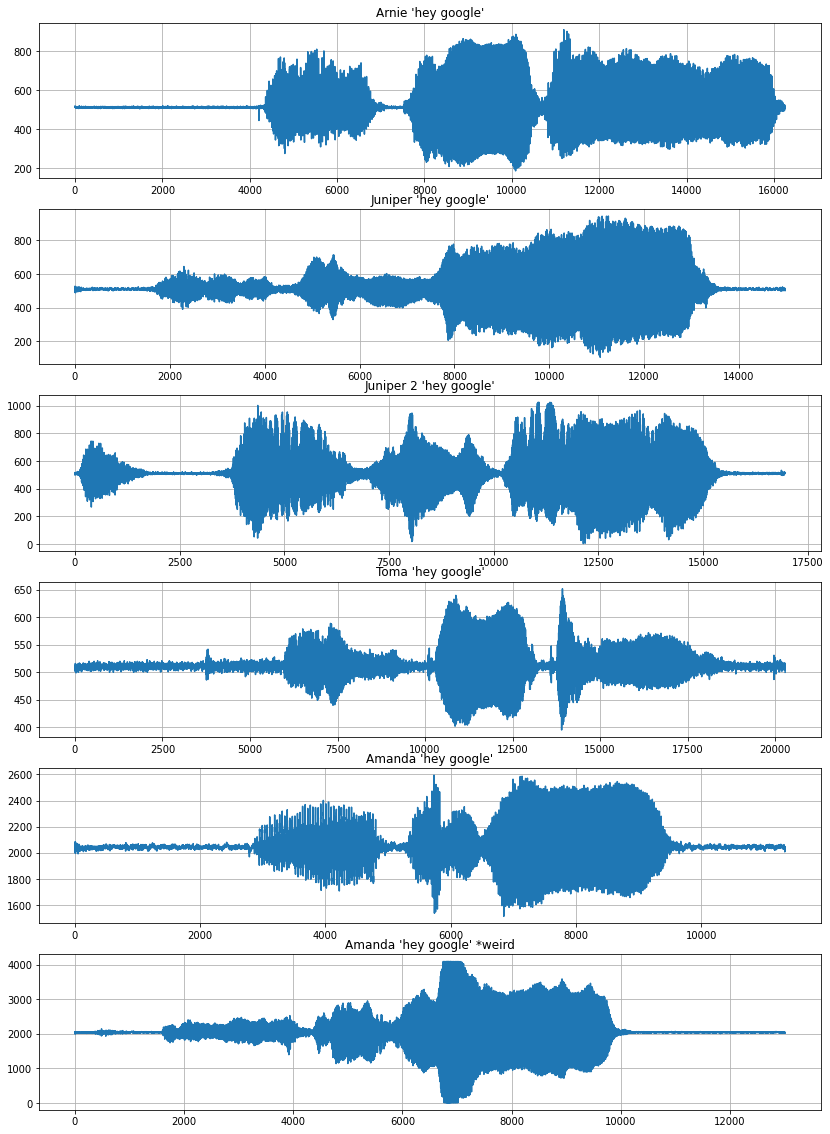

In [121]:
# plot part of data..
#fig, ax = plt.subplots( figsize=(14.0,7.5))
fig, axs = plt.subplots(6, figsize=(14, 20))
axs[0].set_title("Arnie 'hey google'")
axs[0].grid()
axs[0].plot(a5)

axs[1].set_title("Juniper 'hey google'")
axs[1].grid()
axs[1].plot(j2)

axs[2].set_title("Juniper 2 'hey google'")
axs[2].grid()
axs[2].plot(j3)

axs[3].set_title("Toma 'hey google'")
axs[3].grid()
axs[3].plot(t2)

axs[4].set_title("Amanda 'hey google'")
axs[4].grid()
axs[4].plot(am1)

axs[5].set_title("Amanda 'hey google' *weird")
axs[5].grid()
axs[5].plot(am3)


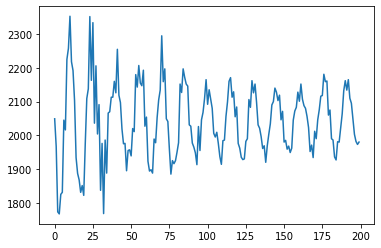

In [143]:
plt.plot(am3[4000:4200])

In [95]:
## routines:
##    get_fft(d, fs)
##    fft_plot1(d, fs)
##    fft_plot2(d1, fs1, d2, fs2)
##    fft_plot3(d1, fs1, d2, fs2, d3, fs3)

# return: fft, fftx
def get_fft(d, fs):
    N=d.size
    T=1.0/fs
    ave=np.average(d)
    df=fft(d-ave)            # FFT 
    dfx=fftfreq(N,T)[:N//2]  # positive frequency space [Hz]
    dfn=2.0/N * np.abs(df[:N//2])  # normalized FFT
    return dfn, dfx
    
def fft_plot1(d, fs):
    N=d.size
    T=1.0/fs
    ave=np.average(d)
    df=fft(d-ave)            # FFT 
    dfx=fftfreq(N,T)[:N//2]  # positive frequency space [Hz]
    plt.plot(dfx, 2.0/N * np.abs(df[:N//2]))

def fft_plot3(d1, fs1, d2, fs2, d3, fs3,subtitle=None):
    N1=d1.size
    T1=1.0/fs1
    ave1=np.average(d1)
    df1=fft(d1-ave1)            # FFT 
    dfx1=fftfreq(N1,T1)[:N1//2]  # positive frequency space [Hz]
    N2=d2.size
    T2=1.0/fs2
    ave2=np.average(d2)
    df2=fft(d2-ave2)            # FFT 
    dfx2=fftfreq(N2,T2)[:N2//2]  # positive frequency space [Hz]
    N3=d3.size
    T3=1.0/fs3
    ave3=np.average(d3)
    df3=fft(d3-ave3)            # FFT 
    dfx3=fftfreq(N3,T3)[:N3//2]  # positive frequency space [Hz]

    fig, axs = plt.subplots(3, figsize=(14, 8))
    if subtitle:
        fig.suptitle(subtitle)
    axs[0].plot(dfx1, 2.0/N1 * np.abs(df1[:N1//2]))
    axs[1].plot(dfx2, 2.0/N2 * np.abs(df2[:N2//2]))
    axs[2].plot(dfx3, 2.0/N3 * np.abs(df3[:N3//2]))
    
    
def fft_plot2(d1, fs1, d2, fs2):
    N1=d1.size
    T1=1.0/fs1
    ave1=np.average(d1)
    df1=fft(d1-ave1)            # FFT 
    dfx1=fftfreq(N1,T1)[:N1//2]  # positive frequency space [Hz]
    N2=d2.size
    T2=1.0/fs2
    ave2=np.average(d2)
    df2=fft(d2-ave2)            # FFT 
    dfx2=fftfreq(N2,T2)[:N2//2]  # positive frequency space [Hz]

    fig, axs = plt.subplots(2, figsize=(14, 8))
    axs[0].plot(dfx1, 2.0/N1 * np.abs(df1[:N1//2]))
    axs[1].plot(dfx2, 2.0/N2 * np.abs(df2[:N2//2]))


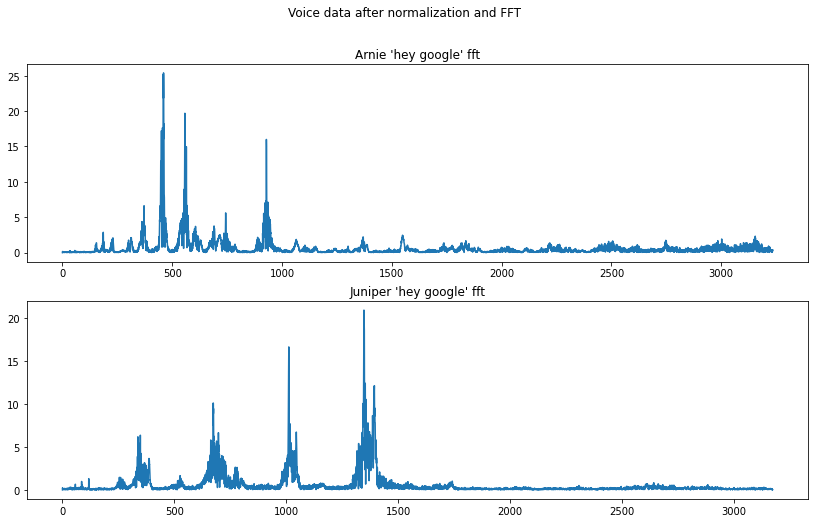

In [56]:
# Plot example, looking at FFT of voice data
# Pretty cool.  What about just the isolated parts?  How to automate?
fsa5 = 1/6469.0
Na5=a5.size
a5_ave = np.average(a5)  # remove the DC component
a5f = fft(a5 - a5_ave)
a5x = fftfreq(Na5, fsa5)[:Na5//2]
Nj2 = j2.size
fsj2 = 1/6346.0
j2_ave = np.average(j2)
j2f = fft(j2 - j2_ave)
j2x = fftfreq(Nj2, fsj2)[:Nj2//2]

# plot part of data..
#fig, ax = plt.subplots( figsize=(14.0,7.5))

fig, axs = plt.subplots(2, figsize=(14, 8))
fig.suptitle('Voice data after normalization and FFT')
axs[0].set_title("Arnie 'hey google' fft")
axs[0].plot(a5x, 2.0/Na5 * np.abs(a5f[:Na5//2]))
axs[1].set_title("Juniper 'hey google' fft")
axs[1].plot(j2x, 2.0/Nj2 * np.abs(j2f[:Nj2//2]))

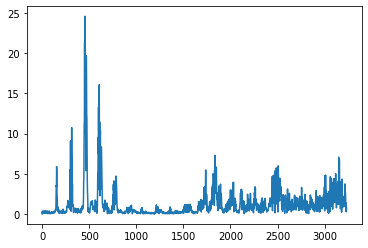

In [23]:
# Look at the different windows of hte audio
fft_plot1(a5[3900:7100],6469)

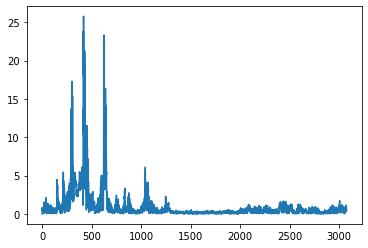

In [135]:
## Look at FT for Amanda voice, over three distinct regions
fft_plot1(am1, 6152)

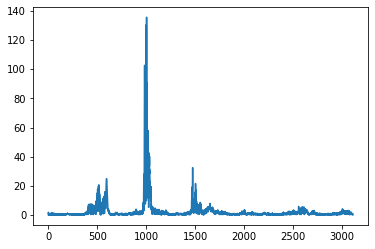

In [136]:
## Look at FT for Amanda voice, over three distinct regions
fft_plot1(am3, 6228)

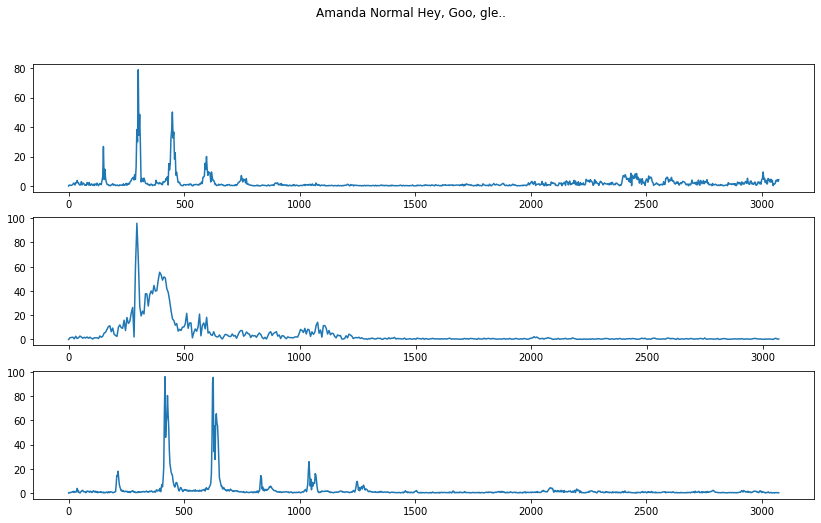

In [137]:
## Look at FT for Amanda's "normal" voice, over three distinct regions
fft_plot3(am1[3000:5000],6152,am1[5500:6500],6152, am1[6700:9000],6152, "Amanda Normal Hey, Goo, gle..")

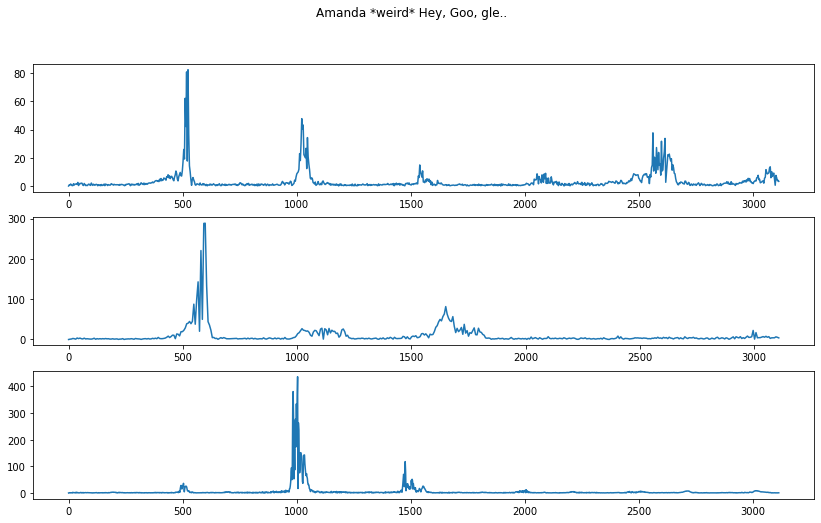

In [140]:
## Look at FT for Amanda's "normal" voice, over three distinct regions
fft_plot3(am3[2000:4000],6228,am3[4500:5500],6228, am3[6000:9500],6228, "Amanda *weird* Hey, Goo, gle..")

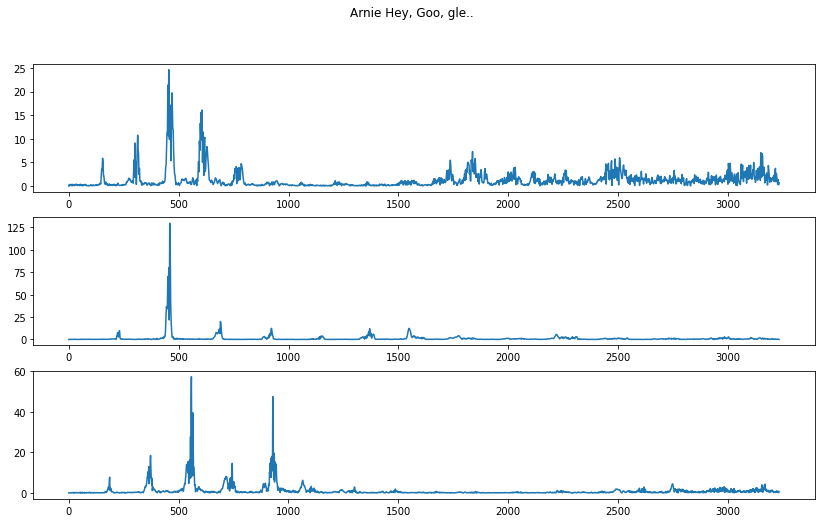

In [114]:
## Look at FT for Arnie voice, over three distinct regions
fft_plot3(a5[3900:7100],6469,a5[7500:10500],6469, a5[10700:15500],6469, "Arnie Hey, Goo, gle..")

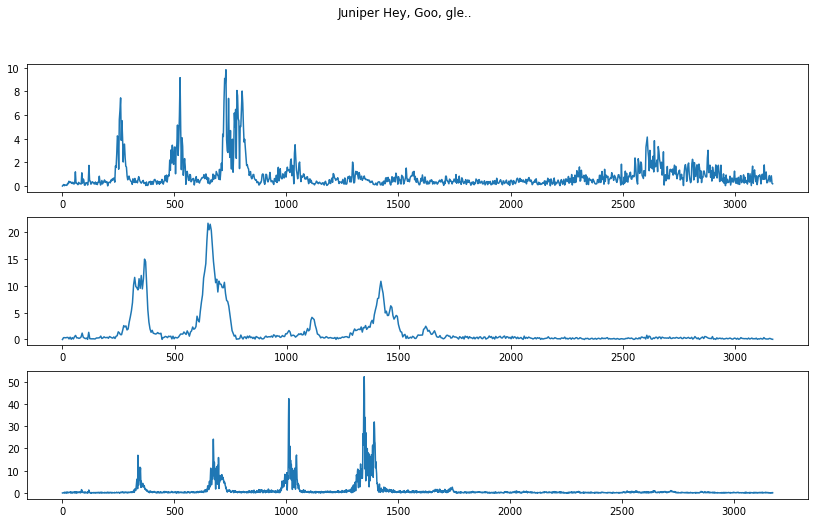

In [115]:
## Look at FT for Juniper voice, over three distinct regions
## <2000: 4000; 4600:5800; 7500:13000
fft_plot3(j2[1800:4000],6346,j2[4600:5900],6346, j2[7500:13000],6346, "Juniper Hey, Goo, gle..")

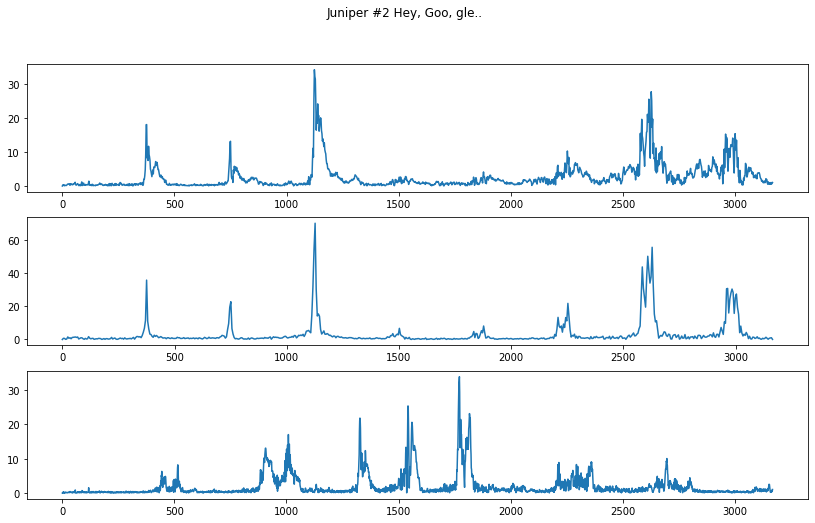

In [117]:
## Look at FT for Juniper voice2, over three distinct regions
## 3000: 6000; 7000:10000; 10000:15000
fft_plot3(j3[3000:6000],6339,j3[4600:5900],6339, j3[7500:13000],6339, "Juniper #2 Hey, Goo, gle..")

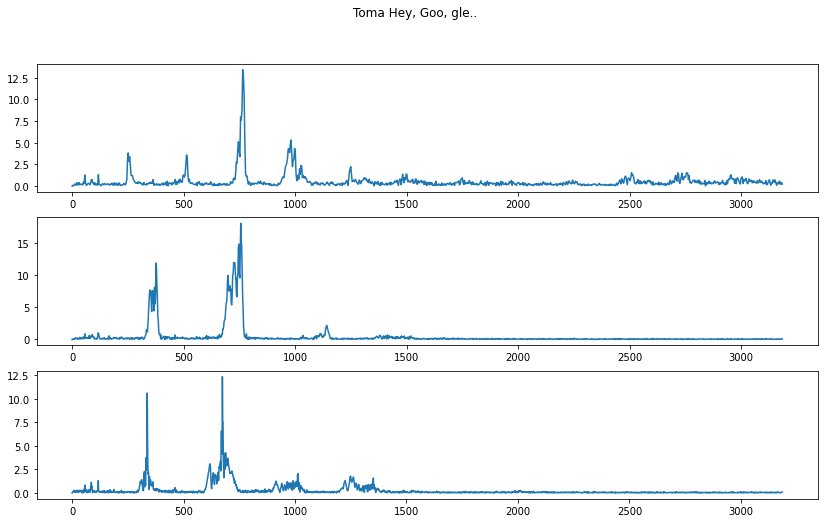

In [119]:
## Look at FT for Toma voice, over three distinct regions
## 3000: 6000; 7000:10000; 10000:15000
fft_plot3(t2[6000:8000],6374,t2[10000:13000],6374, t2[13500:18000],6374, "Toma Hey, Goo, gle..")

Peaks: 15


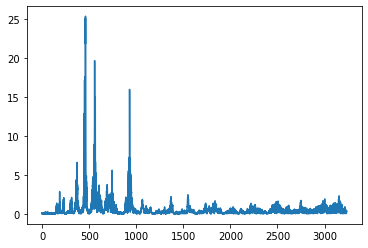

In [104]:
## Ok - Arnie - take FFT, and try to find peaks.
## returns FFT (absolute, >0, normailzed) and associated frequency space
a5f, a5ff = get_fft(a5, 6469)
a5p = signal.find_peaks(a5f,height=5, distance=10)
print("Peaks: {}".format(a5p[0].size))
fft_plot1(a5,6469)

In [178]:
print("Peaks: {}".format(a5p[0].size))
for x in a5p[0]:
    print("peak, x: {}, freq: {}, value: {}".format( x, a5ff[x], a5f[x]))

Peaks: 15
peak, x: 934, freq: 371.6352564891131, value: 6.6196489508999
peak, x: 1116, freq: 444.052404969861, value: 6.603350265620878
peak, x: 1133, freq: 450.81664411366717, value: 17.220241036578766
peak, x: 1145, freq: 455.59140115635387, value: 17.63529385211871
peak, x: 1157, freq: 460.3661581990405, value: 25.39260817439293
peak, x: 1382, freq: 549.8928527494157, value: 5.633537388534081
peak, x: 1401, freq: 557.4528847336696, value: 19.688934960672423
peak, x: 1418, freq: 564.2171238774757, value: 14.96808793789295
peak, x: 1438, freq: 572.1750522819535, value: 5.256289506806507
peak, x: 1868, freq: 743.2705129782262, value: 5.609320168373721
peak, x: 2303, freq: 916.3554557756182, value: 5.537309423049627
peak, x: 2316, freq: 921.5281092385288, value: 7.0149823009676116
peak, x: 2334, freq: 928.6902448025588, value: 15.990081194707763
peak, x: 2351, freq: 935.454483946365, value: 7.121991403273107
peak, x: 2361, freq: 939.4334481486039, value: 5.047025856499801


Peaks: 24


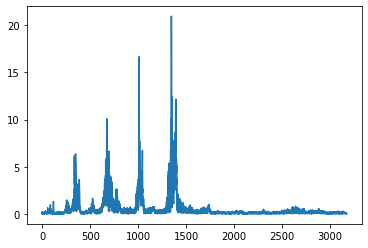

In [106]:
## Ok - take FFT, and try to find peaks.
## returns FFT (absolute, >0, normailzed) and associated frequency space
j2f, j2ff = get_fft(j2, 6346)
j2p = signal.find_peaks(j2f,height=5, distance=10)
print("Peaks: {}".format(j2p[0].size))
fft_plot1(j2,6346)

In [108]:
print("Peaks: {}".format(j2p[0].size))
for x in j2p[0]:
    print("peak, x: {}, freq: {}, value: {}".format( x, j2ff[x], j2f[x]))

Peaks: 24
peak, x: 795, freq: 336.8994991652755, value: 6.17519788117955
peak, x: 821, freq: 347.9175959933222, value: 6.363519652179728
peak, x: 1563, freq: 662.3571285475794, value: 5.806230947755397
peak, x: 1588, freq: 672.9514524207012, value: 10.090557597361462
peak, x: 1602, freq: 678.8842737896495, value: 5.475526335736433
peak, x: 1625, freq: 688.6310517529216, value: 5.681430648773762
peak, x: 1644, freq: 696.6827378964942, value: 6.655566797178464
peak, x: 2386, freq: 1011.1222704507513, value: 16.652686565131724
peak, x: 2397, freq: 1015.783772954925, value: 7.705697425422139
peak, x: 2411, freq: 1021.7165943238732, value: 5.461993409204112
peak, x: 2465, freq: 1044.6003338898165, value: 6.729766307896638
peak, x: 3122, freq: 1323.0191652754593, value: 5.394337465450388
peak, x: 3141, freq: 1331.070851419032, value: 5.112415251615406
peak, x: 3167, freq: 1342.0889482470786, value: 10.062309619406609
peak, x: 3178, freq: 1346.7504507512522, value: 20.943643386446237
peak, x:

In [211]:
## Find peaks codlet
# 1. Find peaks great (top 4+, distance > 15?)

# j2p = signal.find_peaks(j2f,height=5, distance=10)
def get_peaks(df, dfx, prnt=False, height=5, distance=10, nPeaks=5):
    dp = signal.find_peaks(df, height=height, distance=distance)
    if dp[0].size>nPeaks:
      return get_peaks(df, dfx, height=height*1.1, distance=distance, nPeaks=nPeaks)
    else:
      if prnt:
        for i in dp[0]:
          print("peak, x: {}, freq: {}, value: {}".format( i, dfx[i], df[i]))
    # this is the index of the peaks
    return dp[0]
        
 

In [230]:
def get_sig(df, dfx, di):
    freqs = np.array([dfx[i] for i in di])
    vals = np.array([df[i] for i in di])

    for f in freqs:
        print("F: {}".format(f))
    for v in vals:
        print("Val: {}".format(v))
    max_i = np.argmax(vals)
    max_value=vals[max_i]
    print("max val: {}, max freq: {}".format(max_value, freqs[max_i]))
    # normalized frequency..
    norm_value = np.dot(vals, freqs)/np.sum(vals)
    print("norm val: {}".format(norm_value))
    high_freqs = np.extract(vals > max_value*.5, freqs)
    for f in high_freqs:
        print("High freq: {}".format(f))
    return freqs, vals
    

In [227]:
x=np.array([1,2,3,4,5])
condition = x > 2
print(condition)
y=np.extract(condition, x)
print(y)

[False False  True  True  True]
[3 4 5]


In [231]:
jpi = get_peaks(j2f, j2ff, distance = 30, nPeaks=7)
get_sig(j2f, j2ff, jpi)

F: 672.9514524207012
F: 696.6827378964942
F: 1011.1222704507513
F: 1044.6003338898165
F: 1346.7504507512522
F: 1364.5489148580969
F: 1393.3654757929885
Val: 10.090557597361462
Val: 6.655566797178464
Val: 16.652686565131724
Val: 6.729766307896638
Val: 20.943643386446237
Val: 7.800546909692599
Val: 12.140960443861816
max val: 20.943643386446237, max freq: 1346.7504507512522
norm val: 1124.0314280980715
High freq: 1011.1222704507513
High freq: 1346.7504507512522


(array([ 672.95145242,  696.6827379 , 1011.12227045, 1044.60033389,
        1346.75045075, 1364.54891486, 1393.36547579]),
 array([10.0905576 ,  6.6555668 , 16.65268657,  6.72976631, 20.94364339,
         7.80054691, 12.14096044]))

In [199]:
get_peaks(a5f, a5ff, distance = 10, nPeaks=7)

peak, x: 1133, freq: 450.81664411366717, value: 17.220241036578766
peak, x: 1145, freq: 455.59140115635387, value: 17.63529385211871
peak, x: 1157, freq: 460.3661581990405, value: 25.39260817439293
peak, x: 1401, freq: 557.4528847336696, value: 19.688934960672423
peak, x: 1418, freq: 564.2171238774757, value: 14.96808793789295
peak, x: 2334, freq: 928.6902448025588, value: 15.990081194707763


In [203]:

get_peaks(am1f, am1ff, distance = 10, nPeaks=7)

peak, x: 122, freq: 150.1088, value: 10.278001245021965
peak, x: 245, freq: 301.448, value: 31.096144247122005
peak, x: 353, freq: 434.33119999999997, value: 6.34974327957083
peak, x: 366, freq: 450.3264, value: 20.815676056883554
peak, x: 379, freq: 466.3216, value: 6.869065727867399
peak, x: 486, freq: 597.9744, value: 8.322983558074668


In [206]:
get_peaks(am1f, am1ff, distance = 30, nPeaks=7)

peak, x: 122, freq: 150.1088, value: 10.278001245021965
peak, x: 245, freq: 301.448, value: 31.096144247122005
peak, x: 366, freq: 450.3264, value: 20.815676056883554
peak, x: 486, freq: 597.9744, value: 8.322983558074668


In [208]:
get_peaks(t2f, t2ff, height=2, distance = 10, nPeaks=10)

peak, x: 79, freq: 251.77300000000002, value: 3.8145910239891565
peak, x: 161, freq: 513.1070000000001, value: 3.591267838471319
peak, x: 240, freq: 764.8800000000001, value: 13.413273365907358
peak, x: 308, freq: 981.5960000000001, value: 5.318129975674657
peak, x: 322, freq: 1026.2140000000002, value: 2.3617121353262696
peak, x: 392, freq: 1249.304, value: 2.228380682024074
